<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dataset-Telco_churn" data-toc-modified-id="Dataset-Telco_churn-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dataset Telco_churn</a></span><ul class="toc-item"><li><span><a href="#Load-Telco_churn" data-toc-modified-id="Load-Telco_churn-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load Telco_churn</a></span></li><li><span><a href="#Correlations" data-toc-modified-id="Correlations-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Correlations</a></span></li></ul></li><li><span><a href="#Train-model" data-toc-modified-id="Train-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Train model</a></span><ul class="toc-item"><li><span><a href="#Explainable-Boosting" data-toc-modified-id="Explainable-Boosting-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Explainable Boosting</a></span></li><li><span><a href="#Entrainer-Gradient-Boosting-sur-les-predictions-de-EBM" data-toc-modified-id="Entrainer-Gradient-Boosting-sur-les-predictions-de-EBM-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Entrainer Gradient Boosting sur les predictions de EBM</a></span></li><li><span><a href="#Model-trained-on-real-data" data-toc-modified-id="Model-trained-on-real-data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Model trained on real data</a></span></li></ul></li><li><span><a href="#Shapley-values" data-toc-modified-id="Shapley-values-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Shapley values</a></span><ul class="toc-item"><li><span><a href="#Shappley-values-calculées-par-Shap-dependent" data-toc-modified-id="Shappley-values-calculées-par-Shap-dependent-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Shappley values calculées par Shap dependent</a></span></li><li><span><a href="#Shapley-Values-calculées-par-ACV" data-toc-modified-id="Shapley-Values-calculées-par-ACV-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Shapley Values calculées par ACV</a></span></li></ul></li><li><span><a href="#Comparaison" data-toc-modified-id="Comparaison-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Comparaison</a></span><ul class="toc-item"><li><span><a href="#Kendall's-rank-correlation" data-toc-modified-id="Kendall's-rank-correlation-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Kendall's rank correlation</a></span></li><li><span><a href="#Sélection-des-observations-qui-semblent-contenir-le-plus-de-différences" data-toc-modified-id="Sélection-des-observations-qui-semblent-contenir-le-plus-de-différences-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Sélection des observations qui semblent contenir le plus de différences</a></span></li><li><span><a href="#Distances" data-toc-modified-id="Distances-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Distances</a></span></li></ul></li><li><span><a href="#Features-importance" data-toc-modified-id="Features-importance-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Features importance</a></span><ul class="toc-item"><li><span><a href="#Using-SHAP" data-toc-modified-id="Using-SHAP-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Using SHAP</a></span></li><li><span><a href="#Using-ACV" data-toc-modified-id="Using-ACV-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Using ACV</a></span></li></ul></li><li><span><a href="#Quels-éléments-caractérisent-les-différences-entre-Shap-et-ACV-?" data-toc-modified-id="Quels-éléments-caractérisent-les-différences-entre-Shap-et-ACV-?-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Quels éléments caractérisent les différences entre Shap et ACV ?</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Anomaly-Score" data-toc-modified-id="Anomaly-Score-6.0.1"><span class="toc-item-num">6.0.1&nbsp;&nbsp;</span>Anomaly Score</a></span></li></ul></li><li><span><a href="#Comparison-of-local-shapley-values" data-toc-modified-id="Comparison-of-local-shapley-values-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Comparison of local shapley values</a></span></li></ul></li><li><span><a href="#Shapash-pour-contribution-graphs" data-toc-modified-id="Shapash-pour-contribution-graphs-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Shapash pour contribution graphs</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Shapash-with-SHAP" data-toc-modified-id="Shapash-with-SHAP-7.0.1"><span class="toc-item-num">7.0.1&nbsp;&nbsp;</span>Shapash with SHAP</a></span></li><li><span><a href="#Shapash-with-ACV" data-toc-modified-id="Shapash-with-ACV-7.0.2"><span class="toc-item-num">7.0.2&nbsp;&nbsp;</span>Shapash with ACV</a></span></li></ul></li></ul></li><li><span><a href="#Calcul-SDP-et-Active-Shapley-Values" data-toc-modified-id="Calcul-SDP-et-Active-Shapley-Values-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Calcul SDP et Active Shapley Values</a></span></li></ul></div>

# Comparison between SHAP and ACV on TELCO Churn dataset

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import time
import category_encoders as ce
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_curve, roc_auc_score, 
    precision_recall_curve, average_precision_score)
from sklearn.ensemble import GradientBoostingClassifier

from interpret.glassbox import ExplainableBoostingClassifier

from shapash.explainer.smart_explainer import SmartExplainer

from dataprocess_telco import get_mapping_preprocessTotalCharges, plot_roc_pr_curves

sns.set_style("whitegrid")
%matplotlib inline 

In [5]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)

/var/folders/vx/l43p82cn1ylgg3r9stjj9lww0000gn/T/ipykernel_94966/1305530556.py:4: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



## Dataset Telco_churn

### Load Telco_churn

In [6]:
telco = pd.read_csv("data/telco_churn.csv")

In [7]:
telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
from dataprocess_telco import get_mapping_preprocessTotalCharges, plot_roc_pr_curves
mapperTC = get_mapping_preprocessTotalCharges()
telco['TotalCharges'] = mapperTC.fit_transform(telco)

INFO:sklearn_pandas:[FIT_TRANSFORM] TotalCharges: 0.001839 secs


In [9]:
telco['TotalCharges'] = telco['TotalCharges'].replace({np.nan: telco['TotalCharges'].mean()})

In [10]:
    binary_features = ['Dependents',
                       'PaperlessBilling',
                       'Partner',
                       'PhoneService',
                       'gender',
                       'Churn']
telco[binary_features] = telco[binary_features].replace({'Yes': 1,'No': 0 })

In [11]:
    list_onehot = ['Contract',
                            'DeviceProtection',
                            'InternetService',
                            'MultipleLines',
                            'OnlineBackup',
                            'OnlineSecurity',
                            'PaymentMethod',
                            'StreamingTV',
                            'TechSupport',
                            'StreamingMovies']

In [12]:
y = telco['Churn']
X = telco.drop(columns=['Churn','gender','customerID'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
encoder_onehot = ce.OneHotEncoder(cols=list_onehot, handle_unknown="None").fit(X_train)

X_train = encoder_onehot.transform(X_train)
X_test = encoder_onehot.transform(X_test)

In [14]:
X_train.shape

(5634, 39)

In [15]:
list_col_onehot = [m['mapping'].columns.to_list() for m in encoder_onehot.mapping]
list_col_onehot_ids = [[X_test.columns.to_list().index(col) for col in list_col] for list_col in list_col_onehot]

In [16]:
list_col_onehot_ids

[[29, 30, 31],
 [17, 18, 19],
 [8, 9, 10],
 [5, 6, 7],
 [14, 15, 16],
 [11, 12, 13],
 [33, 34, 35, 36],
 [23, 24, 25],
 [20, 21, 22],
 [26, 27, 28]]

In [17]:
import scipy as sp

In [18]:
print(sp.stats.pearsonr(X_train["MonthlyCharges"],X_train["TotalCharges"]))

(0.6511454888980533, 0.0)


In [19]:
print(sp.stats.spearmanr(X_train["MonthlyCharges"],X_train["TotalCharges"]))

SpearmanrResult(correlation=0.6422409874047692, pvalue=0.0)


### Correlations

## Train model


### Explainable Boosting


In [75]:
ebm = ExplainableBoostingClassifier(max_bins=512, max_interaction_bins=64, max_leaves=6)
ebm.fit(X_train, y_train)

ExplainableBoostingClassifier(feature_names=['SeniorCitizen', 'Partner',
                                             'Dependents', 'tenure',
                                             'PhoneService', 'MultipleLines_1',
                                             'MultipleLines_2',
                                             'MultipleLines_3',
                                             'InternetService_1',
                                             'InternetService_2',
                                             'InternetService_3',
                                             'OnlineSecurity_1',
                                             'OnlineSecurity_2',
                                             'OnlineSecurity_3',
                                             'OnlineBackup_1', 'OnlineBackup_2',
                                             'OnlineBackup_3',
                                             'DeviceProtection_1'...
                                            

In [76]:
y_proba_ebm = ebm.predict_proba(X_test)
y_pred_ebm = ebm.predict(X_test)

Roc AUC score : 0.8640522943472005
PR AUC score  : 0.697596668964217


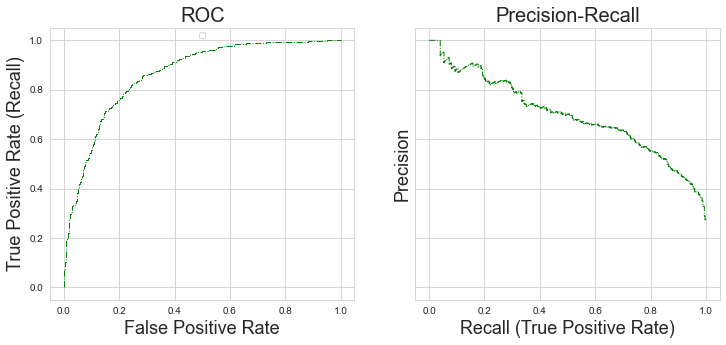

In [77]:
plot_roc_pr_curves(y_test,y_proba_ebm[:,1])

In [78]:
from interpret import show

ebm_global = ebm.explain_global()
show(ebm_global)

INFO:interpret.visual.udash:Generating mini dash
INFO:interpret.visual.udash:Generated mini dash


<!-- http://127.0.0.1:7001/140717632483680/ -->

### Entrainer Gradient Boosting sur les predictions de EBM

Comme ça on le schema génératif des données X/y

In [79]:
np.random.seed(42)
noise_rate = 0.03

In [80]:
y_train_ebm = ebm.predict(X_train)
inds = np.random.choice(y_train_ebm.size,
                        size=int(y_train_ebm.size*noise_rate)) 

In [81]:
for ind in inds:
    if y_train_ebm[ind] ==1:
        y_train_ebm[ind] = 0
    else:
        y_train_ebm[ind] = 1

In [82]:
y_test_ebm = ebm.predict(X_test)
np.random.seed(42)
inds = np.random.choice(y_test_ebm.size, 
                        size=int(y_test_ebm.size*noise_rate)) 
for ind in inds:
    if y_test_ebm[ind] ==1:
        y_test_ebm[ind] = 0
    else:
        y_test_ebm[ind] = 1

In [83]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train_ebm)

GradientBoostingClassifier()

In [84]:
y_proba_gb = model.predict_proba(X_test)
y_pred_gb = model.predict(X_test)

Roc AUC score : 0.9405204973396191
PR AUC score  : 0.9178504411484638


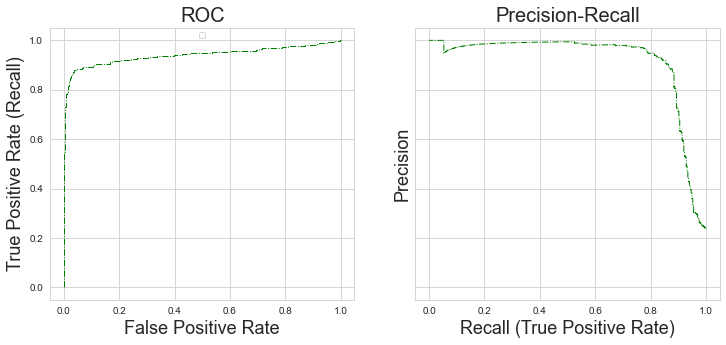

In [85]:
plot_roc_pr_curves(y_test_ebm,y_proba_gb[:,1])

## Shapley values

### Shappley values calculées par Shap dependent


In [167]:
import shap

explainer = shap.TreeExplainer(model=model, model_output="raw", feature_perturbation="tree_path_dependent")

In [168]:
start_time_shap = time.time()
shap_values = explainer.shap_values(X_test)
end_time_shap = time.time()

In [169]:
print("--- %s s ---" % (end_time_shap - start_time_shap))

--- 0.09812808036804199 s ---


### Shapley Values calculées par ACV

In [170]:
from acv_explainers import ACVTree

In [171]:
acvtree = ACVTree(model=model, data=X_train.values, cache_normalized=True)

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 667.45it/s]


In [172]:
data = np.array(X_train.values, dtype=np.double)

In [173]:
start_time = time.time()
shap_values_acv = acvtree.py_shap_values(np.array(X_test, dtype=np.double), C=list_col_onehot_ids)
end_time = time.time()

In [174]:
print("--- %s sec ---" % (end_time - start_time))

--- 2.433966875076294 sec ---


convert to dataframe

In [175]:
# To dataframes
shap_values = pd.DataFrame(shap_values, columns=X_test.columns, index=X_test.index)
shap_values_acv = pd.DataFrame(shap_values_acv[:, :, 0], columns=X_test.columns, index=X_test.index)

shap_values2 = shap_values.copy()
shap_values_acv2 = shap_values_acv.copy()

In [176]:
# Take coalition value from first ohe value (acv shapley values)
for mapping in encoder_onehot.mapping:
    shap_values_acv[mapping['col']] =  shap_values_acv.loc[:, mapping['mapping'].columns[0]]
    shap_values_acv.drop(mapping['mapping'].columns, axis=1, inplace=True)

In [177]:
# Sum shapley values for ohe variables (shap shapley values dependent)
for mapping in encoder_onehot.mapping:
    shap_values[mapping['col']] =  shap_values.loc[:, mapping['mapping'].columns].sum(axis=1)
    shap_values.drop(mapping['mapping'].columns, axis=1, inplace=True)

In [178]:
shap_values_acv.shape

(1409, 18)

## Comparaison

### Kendall's rank correlation

In [179]:
from compute_utils import compute_kendall
kendall_res = compute_kendall(shap_values.abs(), shap_values_acv.abs())
print("Kendall's rank mean :")
np.mean(kendall_res)

Kendall's rank mean :


0.8677038830673033

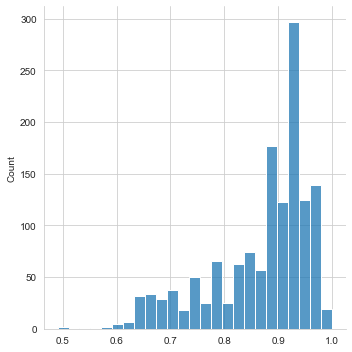

In [180]:
sns.displot(kendall_res)

In [181]:
np.argmin(kendall_res), min(kendall_res)

(426, 0.4901960784313726)

### Sélection des observations qui semblent contenir le plus de différences

In [182]:
list_obs_diff = [x for x in range(len(shap_values)) if kendall_res[x] < 0.7]
len(list_obs_diff)

136

### Distances

In [183]:
# Changes so that if shap values < 0.01, the observation is not used.
shap_values_repl = shap_values.copy()
shap_values_repl[shap_values_repl.abs() < 0.01] = np.nan
diff = (shap_values_acv - shap_values).abs() / shap_values_repl.abs()
diff.replace([np.inf, -np.inf], np.nan, inplace=True)
# diff.fillna(0, inplace=True)
diff_m = diff.mean(axis=0, skipna=True)
diff_std = diff.std(axis=0, skipna=True)

In [184]:
features_selected = diff_m.sort_values(ascending=False)[:10].index

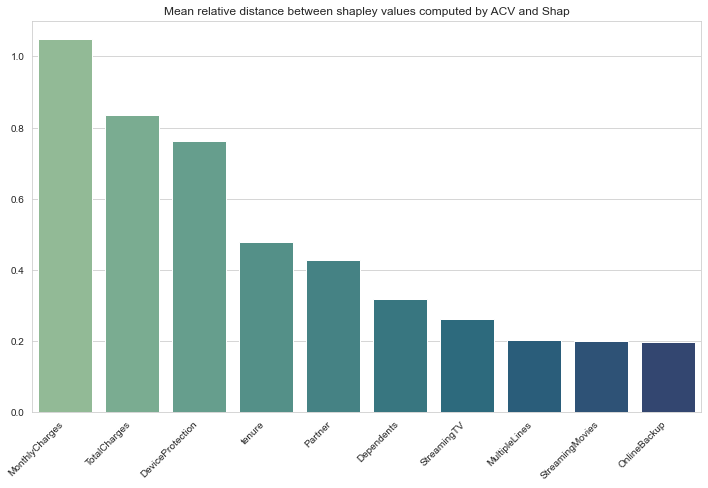

In [185]:
# Pondérer par features impt
fig = plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.barplot(
    x=diff_m.loc[features_selected].index, 
    y=diff_m.loc[features_selected].values, 
    palette='crest'
)
plt.title('Mean relative distance between shapley values computed by ACV and Shap')
fig.autofmt_xdate(rotation=45)
#plt.show()
plt.savefig('plots/relative_distance.jpg')

## Features importance

### Using SHAP

In [186]:
set_all_imp_features = set(shap_values_acv.abs().mean(axis=0).sort_values().index).union(shap_values.abs().mean(axis=0).sort_values()[-10:].index)
color_palette = {col: color for col, color in zip(
    set_all_imp_features,
    sns.color_palette("tab10", len(set_all_imp_features))
)}

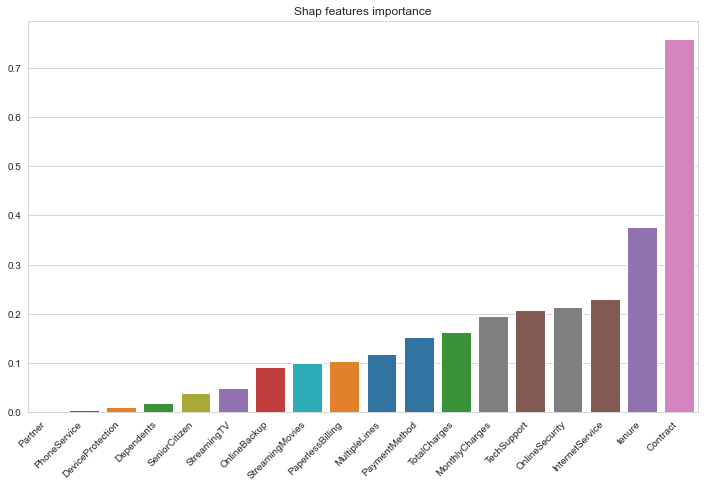

In [187]:
fig = plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.barplot(
    x=shap_values.abs().mean(axis=0).sort_values().index, 
    y=shap_values.abs().mean(axis=0).sort_values().values, 
    palette=color_palette
)
plt.title('Shap features importance')
fig.autofmt_xdate(rotation=45)
#plt.show()
plt.savefig('plots/shap_features_importance.jpg')

### Using ACV

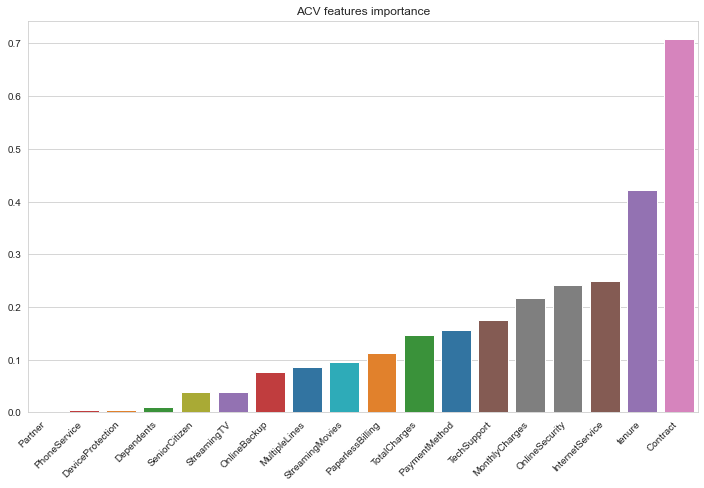

In [188]:
fig = plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.barplot(
    x=shap_values_acv.abs().mean(axis=0).sort_values().index, 
    y=shap_values_acv.abs().mean(axis=0).sort_values().values, 
    palette=color_palette
)
plt.title('ACV features importance')
fig.autofmt_xdate(rotation=45)
#plt.show()
plt.savefig('plots/acv_features_importance.jpg')

## Quels éléments caractérisent les différences entre Shap et ACV ?

#### Anomaly Score

In [189]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=100).fit(X_test)
anomaly_score = -isolation_forest.score_samples(X_test)

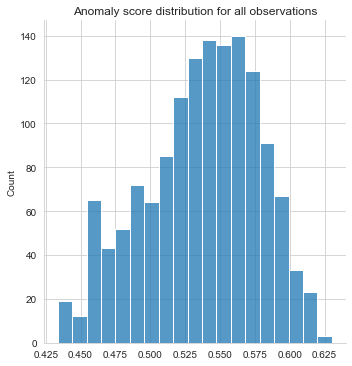

In [190]:
sns.displot(anomaly_score)
plt.title('Anomaly score distribution for all observations')
plt.savefig('plots/anomaly_score_distribution.jpg')

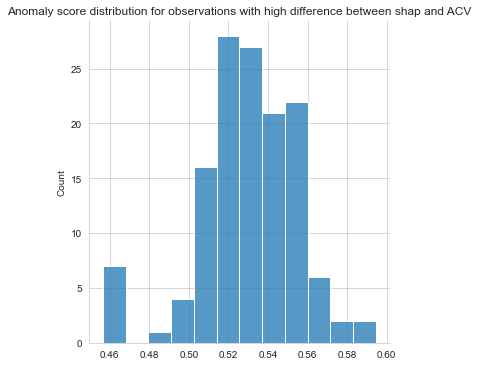

In [191]:
# Distribution of observations with high differences between acv and shap 
sns.displot([anomaly_score[x] for x in range(len(shap_values)) if x in list_obs_diff])
plt.title('Anomaly score distribution for observations with high difference between shap and ACV')
plt.savefig('plots/distribution_anomaly_high_diff.png')

### Comparison of local shapley values

In [192]:
y_pred_df = pd.DataFrame(y_pred_gb, index=X_test.index)

In [193]:
list_obs_diff

[0,
 2,
 9,
 21,
 31,
 35,
 45,
 63,
 66,
 78,
 84,
 122,
 128,
 149,
 173,
 183,
 184,
 190,
 192,
 201,
 215,
 222,
 226,
 241,
 261,
 273,
 279,
 283,
 291,
 305,
 306,
 314,
 345,
 352,
 400,
 410,
 420,
 423,
 426,
 430,
 436,
 450,
 457,
 471,
 491,
 511,
 523,
 524,
 548,
 552,
 562,
 566,
 606,
 634,
 643,
 644,
 652,
 654,
 662,
 676,
 684,
 715,
 734,
 738,
 748,
 751,
 754,
 769,
 775,
 778,
 793,
 796,
 801,
 802,
 813,
 819,
 821,
 843,
 847,
 852,
 854,
 868,
 879,
 880,
 906,
 908,
 925,
 942,
 947,
 950,
 951,
 954,
 956,
 985,
 995,
 1010,
 1017,
 1049,
 1051,
 1057,
 1066,
 1079,
 1090,
 1095,
 1099,
 1123,
 1130,
 1140,
 1153,
 1157,
 1159,
 1161,
 1172,
 1176,
 1185,
 1202,
 1214,
 1219,
 1229,
 1231,
 1252,
 1263,
 1266,
 1274,
 1275,
 1300,
 1309,
 1313,
 1335,
 1360,
 1363,
 1378,
 1380,
 1396,
 1403,
 1406]

In [194]:
client = 94

In [195]:
X_test.iloc[[94]]

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines_1,MultipleLines_2,MultipleLines_3,InternetService_1,InternetService_2,InternetService_3,OnlineSecurity_1,OnlineSecurity_2,OnlineSecurity_3,OnlineBackup_1,OnlineBackup_2,OnlineBackup_3,DeviceProtection_1,DeviceProtection_2,DeviceProtection_3,TechSupport_1,TechSupport_2,TechSupport_3,StreamingTV_1,StreamingTV_2,StreamingTV_3,StreamingMovies_1,StreamingMovies_2,StreamingMovies_3,Contract_1,Contract_2,Contract_3,PaperlessBilling,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,PaymentMethod_4,MonthlyCharges,TotalCharges
233,0,0,0,72,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,20.25,1566.9


## Shapash pour contribution graphs

#### Shapash with SHAP

In [196]:
y_pred_df = pd.DataFrame(y_pred_gb, index=X_test.index)

In [197]:
predict = y_pred_df.rename(columns={0: '_predict_'})

In [198]:
xpl_dependent = SmartExplainer()

In [199]:
xpl_dependent.compile(
    x=X_test,
    model=model,
    x_train=X_train,
    preprocessing=encoder_onehot,
    y_pred=predict,
    contributions=shap_values2
)

In [200]:
xpl_dependent.filter(max_contrib=10)
xpl_dependent.plot.local_plot(index=233)

In [201]:
xpl_dependent.plot.contribution_plot("MonthlyCharges")

In [202]:
xpl_dependent.plot.contribution_plot("TotalCharges")

#### Shapash with ACV

In [203]:
shap_values_acv_shapash = shap_values_acv2
for list in list_col_onehot_ids:
    for col in list:
        shap_values_acv_shapash.iloc[:,col] = shap_values_acv_shapash.iloc[:,col]/len(list)

In [204]:
xpl_acv = SmartExplainer()
xpl_acv.compile(
    x=X_test,
    x_train=X_train,
    preprocessing=encoder_onehot,
    model=model,
    y_pred=predict,
    contributions=shap_values_acv_shapash
)

In [205]:
xpl_acv.filter(max_contrib=10)
xpl_acv.plot.local_plot(index=233)

In [206]:
xpl_acv.plot.contribution_plot("MonthlyCharges")

In [207]:
xpl_acv.plot.contribution_plot("TotalCharges")

## Calcul SDP et Active Shapley Values

In [152]:
import acv_explainers
from plot_utils import styling_dataframe_local_sdp
n_background = 1000

In [141]:
#client = 0
ind = X_train.values[client]
x = np.expand_dims(ind, axis=0)


In [142]:
ind

array([  0.  ,   1.  ,   1.  ,  24.  ,   1.  ,   1.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,
         1.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   1.  ,   0.  ,
         0.  ,   1.  ,   0.  ,   0.  ,   1.  ,   0.  ,   1.  ,   0.  ,
         1.  ,   1.  ,   0.  ,   0.  ,   0.  ,  19.7 , 494.05])

In [143]:
background = np.array(X_test.sample(n=n_background, random_state=1).values, dtype=np.double)

In [144]:
list_col_onehot_ids

[[29, 30, 31],
 [17, 18, 19],
 [8, 9, 10],
 [5, 6, 7],
 [14, 15, 16],
 [11, 12, 13],
 [33, 34, 35, 36],
 [23, 24, 25],
 [20, 21, 22],
 [26, 27, 28]]

In [145]:
sdp_importance, sdp_index, size, sdp = acvtree.importance_sdp_clf(X=X_test.iloc[[client]].values, 
                                                                  data=background, 
                                                                  C=list_col_onehot_ids, 
                                                                  global_proba=0.99)



 21%|█████████▍                                  | 3/14 [00:37<02:16, 12.45s/it]


In [146]:
X_test.iloc[[client]].values.shape

(1, 39)

In [147]:
sdp

array([0.99510262])

In [148]:
sdp.tolist()

[0.9951026238477975]

In [149]:
sdp_importance

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0.])

In [150]:
sdp_importance_df = pd.DataFrame(columns=["SDP"] + X_test.columns.to_list())

sdp_importance_df.loc[0] = sdp.tolist() + sdp_importance.tolist()

In [153]:
local_sdp = styling_dataframe_local_sdp(X_test.iloc[[client]], sdp_importance_df)

In [154]:
local_sdp

,SDP,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines_1,MultipleLines_2,MultipleLines_3,InternetService_1,InternetService_2,InternetService_3,OnlineSecurity_1,OnlineSecurity_2,OnlineSecurity_3,OnlineBackup_1,OnlineBackup_2,OnlineBackup_3,DeviceProtection_1,DeviceProtection_2,DeviceProtection_3,TechSupport_1,TechSupport_2,TechSupport_3,StreamingTV_1,StreamingTV_2,StreamingTV_3,StreamingMovies_1,StreamingMovies_2,StreamingMovies_3,Contract_1,Contract_2,Contract_3,PaperlessBilling,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,PaymentMethod_4,MonthlyCharges,TotalCharges
233,0.995103,0,0,0,72,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,20.250000,1566.900000


In [155]:
S_star, N_star = acv_explainers.utils.get_null_coalition(sdp_index, size)

In [156]:
active_shap_values = acvtree.shap_values_acv_adap(X=X_test.iloc[[client]].values,
                                             C=list_col_onehot_ids,
                                             S_star=S_star,
                                             N_star=N_star,
                                             size=size)


In [157]:
active_shap_values_df = pd.DataFrame(active_shap_values[:, :, 0], columns=X_test.columns)
active_shap_values_df2 = active_shap_values_df.copy()

In [158]:
for mapping in encoder_onehot.mapping:
    active_shap_values_df[mapping['col']] =  active_shap_values_df.loc[:, mapping['mapping'].columns[0]]
    active_shap_values_df.drop(mapping['mapping'].columns, axis=1, inplace=True)

In [159]:
X_test.iloc[[client]].reset_index()

,index,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines_1,MultipleLines_2,MultipleLines_3,InternetService_1,InternetService_2,InternetService_3,OnlineSecurity_1,OnlineSecurity_2,OnlineSecurity_3,OnlineBackup_1,OnlineBackup_2,OnlineBackup_3,DeviceProtection_1,DeviceProtection_2,DeviceProtection_3,TechSupport_1,TechSupport_2,TechSupport_3,StreamingTV_1,StreamingTV_2,StreamingTV_3,StreamingMovies_1,StreamingMovies_2,StreamingMovies_3,Contract_1,Contract_2,Contract_3,PaperlessBilling,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,PaymentMethod_4,MonthlyCharges,TotalCharges
0,233,0,0,0,72,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,20.25,1566.9


In [160]:
client

94

In [161]:
xpl_asv = SmartExplainer()
xpl_asv.compile(
    x=X_test.iloc[[client]].reset_index(drop=True),
    #x_train=X_train,
    preprocessing=encoder_onehot,
    model=model,
    y_pred=predict.iloc[[client]].reset_index(drop=True),
    contributions=active_shap_values_df2.reset_index(drop=True)
)

In [162]:
xpl_asv.filter(max_contrib=10)
xpl_asv.plot.local_plot(index=0)

# Model trained on real data


run the cells below and restart the notebook from the shapley values

In [164]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [165]:
y_proba_gb_raw = model.predict_proba(X_test)
y_pred_gb_raw = model.predict(X_test)

Roc AUC score : 0.8590500688355917
PR AUC score  : 0.6940474140196742


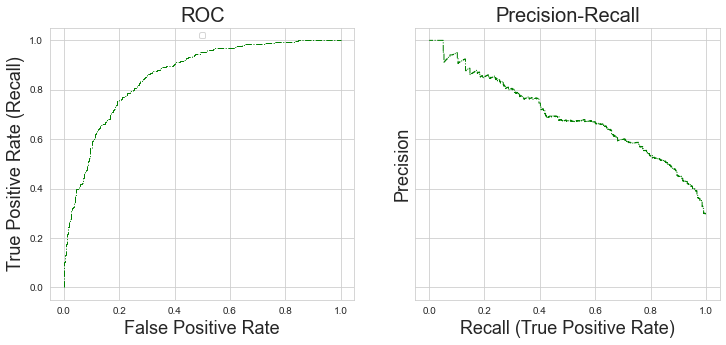

In [166]:
plot_roc_pr_curves(y_test,y_proba_gb_raw[:,1])